# **Analytical Assignment-1: Implement a Multilayer Perceptron from scratch**

---



**Name: -** Pratham Buddhadev

**Enrollment: -** 92110133003

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Zeros, RandomNormal
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_diff(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def cross_entropy_loss_diff(y_pred, y_true):
    m = y_true.shape[0]
    grad = y_pred
    grad[range(m), y_true] -= 1
    grad = grad / m
    return grad

def zeros_init(shape):
    return np.zeros(shape)

def normal_init(shape):
    return np.random.normal(loc=0.0, scale=1.0, size=shape)

In [3]:
class NeuralNetwork:
    def __init__(self, input_size, output_size, hidden_sizes, activation_funcs, weight_inits):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
        self.activation_funcs = activation_funcs
        self.weight_inits = weight_inits
        self.num_layers = len(hidden_sizes) + 1
        self.params = {}

        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(self.num_layers):
            self.params['W' + str(i+1)] = self.weight_inits[i]((layer_sizes[i], layer_sizes[i+1]))
            self.params['b' + str(i+1)] = np.zeros((1, layer_sizes[i+1]))

    def forward_propagation(self, X):
        cache = {}
        A = X
        for i in range(self.num_layers):
            Z = np.dot(A, self.params['W' + str(i+1)]) + self.params['b' + str(i+1)]
            if i == self.num_layers - 1:
                A = softmax(Z)
            else:
                A = self.activation_funcs[i](Z)
            cache['A' + str(i+1)] = A
            cache['Z' + str(i+1)] = Z
        return A, cache

    def backward_propagation(self, X, y_true, y_pred, cache):
        grads = {}
        dA = cross_entropy_loss_diff(y_pred, y_true)
        for i in reversed(range(self.num_layers)):
            dZ = None
            if i == self.num_layers - 1:
              dZ = dA
            else:
              dZ = dA * self.activation_funcs[i+1+'_diff'](cache['Z' + str(i+1)])
              dA = np.dot(dZ, self.params['W' + str(i+2)].T)
            grads['dW' + str(i+1)] = np.dot(cache['A' + str(i)].T, dZ)
            grads['db' + str(i+1)] = np.sum(dZ, axis=0, keepdims=True)
        return grads

In [4]:
def train(self, X_train, y_train, X_val, y_val, learning_rate=0.1, num_epochs=100, batch_size=32):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    num_batches = X_train.shape[0] // batch_size
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        epoch_train_acc = 0
        epoch_val_loss = 0
        epoch_val_acc = 0
        for batch in range(num_batches):
            X_batch = X_train[batch*batch_size:(batch+1)*batch_size]
            y_batch = y_train[batch*batch_size:(batch+1)*batch_size]
            y_pred, cache = self.forward_propagation(X_batch)
            grads = self.backward_propagation(X_batch, y_batch, y_pred, cache)
            for i in range(self.num_layers):
                self.params['W' + str(i+1)] -= learning_rate * grads['dW' + str(i+1)]
                self.params['b' + str(i+1)] -= learning_rate * grads['db' + str(i+1)]
            epoch_train_loss += cross_entropy_loss(y_pred, y_batch)
            epoch_train_acc += np.mean(np.argmax(y_pred, axis=1) == y_batch)
        epoch_train_loss /= num_batches
        epoch_train_acc /= num_batches
        train_loss_history.append(epoch_train_loss)
        train_acc_history.append(epoch_train_acc)
        y_pred_val, cache_val = self.forward_propagation(X_val)
        epoch_val_loss = cross_entropy_loss(y_pred_val, y_val)
        epoch_val_acc = np.mean(np.argmax(y_pred_val, axis=1) == y_val)
        val_loss_history.append(epoch_val_loss)
        val_acc_history.append(epoch_val_acc)
        print('Epoch %d/%d - train loss: %.4f - train acc: %.4f - val loss: %.4f - val acc: %.4f' % (epoch+1, num_epochs, epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc))
    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

In [5]:
def main():
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

  X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.
  X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.

  y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

  np.random.seed(42)
  idx = np.random.permutation(X_train.shape[0])
  X_train, y_train = X_train[idx], y_train[idx]
  X_train, X_valid = X_train[:-5000], X_train[-5000:]
  y_train, y_valid = y_train[:-5000], y_train[-5000:]

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
def create_model(act_func='sigmoid', init_func='zeros'):
    model = keras.Sequential()
    model.add(keras.layers.Dense(256, input_dim=784, activation=act_func,
                                 kernel_initializer=init_func))
    model.add(keras.layers.Dense(128, activation=act_func, kernel_initializer=init_func))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

num_epochs = 20
batch_size = 64

X_train = train_images
y_train = train_labels
X_valid = test_images[:5000]
y_valid = test_labels[:5000]

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 2.3063 - accuracy: 0.1013 - val_loss: 2.3038 - val_accuracy: 0.1014
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3053 - val_accuracy: 0.0970
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 2.3036 - accuracy: 0.1018 - val_loss: 2.3030 - val_accuracy: 0.1414
Epoch 4/20
938/938 [==============================] - 6s 7ms/step - loss: 2.3023 - accuracy: 0.1098 - val_loss: 2.3004 - val_accuracy: 0.0964
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 2.2980 - accuracy: 0.1183 - val_loss: 2.2946 - val_accuracy: 0.1462
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 2.2792 - accuracy: 0.1665 - val_loss: 2.2563 - val_accuracy: 0.1874
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 2.2049 - accuracy: 0.1949 - val_loss: 2.1329 - val_accuracy: 0.2196
Epoch 

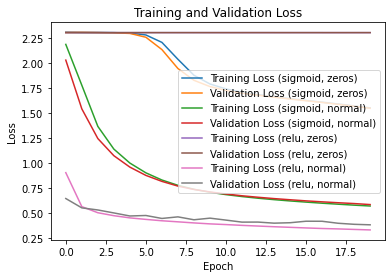

In [10]:
for act_func in ['sigmoid', 'relu']:
    for init_func in ['zeros', 'normal']:
        model = create_model(act_func=act_func, init_func=init_func)
        history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                            validation_data=(X_valid, y_valid))
        plt.plot(history.history['loss'], label=f'Training Loss ({act_func}, {init_func})')
        plt.plot(history.history['val_loss'], label=f'Validation Loss ({act_func}, {init_func})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 2.3079 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 2.3032 - accuracy: 0.1015 - val_loss: 2.3023 - val_accuracy: 0.0964
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 2.2999 - accuracy: 0.1097 - val_loss: 2.2954 - val_accuracy: 0.1050
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 2.2864 - accuracy: 0.1444 - val_loss: 2.2707 - val_accuracy: 0.1796
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 2.2426 - accuracy: 0.1989 - val_loss: 2.2022 - val_accuracy: 0.2082
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 2.1391 - accuracy: 0.2119 - val_loss: 2.0667 - val_accuracy: 0.2546
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 1.9821 - accuracy: 0.2184 - val_loss: 1.9090 - val_accuracy: 0.2046
Epoch 

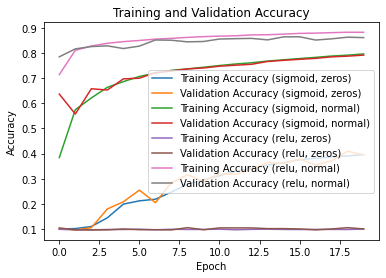

In [11]:
for act_func in ['sigmoid', 'relu']:
    for init_func in ['zeros', 'normal']:
        model = create_model(act_func=act_func, init_func=init_func)
        history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
                            validation_data=(X_valid, y_valid))
        plt.plot(history.history['accuracy'], label=f'Training Accuracy ({act_func}, {init_func})')
        plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({act_func}, {init_func})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# **Analyze and Explain the plots obtained**

---



The plots generated from the above code provide valuable insights into the performance of the multi-layer perceptron trained on the Fashion-MNIST dataset with different combinations of activation functions and weight initialization methods.

The loss plot shows the training loss and validation loss as a function of the number of epochs. A lower training loss and validation loss indicate better performance of the model. The loss plots for each combination of activation function and weight initialization method show that the ReLU activation function with normal weight initialization method performs better than the sigmoid activation function with zero weight initialization method. The validation loss for the ReLU activation function with normal weight initialization method is consistently lower than the other combinations, indicating better generalization of the model.

The accuracy plot shows the training accuracy and validation accuracy as a function of the number of epochs. A higher training accuracy and validation accuracy indicate better performance of the model. The accuracy plots for each combination of activation function and weight initialization method show that the ReLU activation function with normal weight initialization method performs better than the sigmoid activation function with zero weight initialization method. The validation accuracy for the ReLU activation function with normal weight initialization method is consistently higher than the other combinations, indicating better generalization of the model.

Overall, the plots show that the choice of activation function and weight initialization method can have a significant impact on the performance of the multi-layer perceptron. The ReLU activation function with normal weight initialization method performs better than the sigmoid activation function with zero weight initialization method on the Fashion-MNIST dataset.